In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from string import punctuation
from nltk.corpus import stopwords

In [2]:
import math as math

In [3]:
org_data=pd.read_csv("netflix_titles.csv")

In [4]:
data=org_data

In [5]:
data.shape

(6234, 13)

In [6]:
# convert to datetime
data["date_added"] = pd.to_datetime(data['date_added'])
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day
# convert columns "director, listed_in, cast and country" in columns that contain a real list
# the strip function is applied on the elements
# if the value is NaN, the new column contains a empty list []
data['directors'] = data['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
data['categories'] = data['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
data['actors'] = data['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
data['countries'] = data['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

data.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,directors,categories,actors,countries
0,1,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,9.0,"[Richard Finn, Tim Maltby]","[Children & Family Movies, Comedies]","[Alan Marriott, Andrew Toth, Brian Dobson, Col...","[United States, India, South Korea, China]"
1,2,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,9.0,[],[Stand-Up Comedy],[Jandino Asporaat],[United Kingdom]
2,3,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,8.0,[],[Kids' TV],"[Peter Cullen, Sumalee Montano, Frank Welker, ...",[United States]
3,4,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,8.0,[],[Kids' TV],"[Will Friedle, Darren Criss, Constance Zimmer,...",[United States]
4,5,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,8.0,[Fernando Lebrija],[Comedies],"[Nesta Cooper, Kate Walsh, John Michael Higgin...",[United States]


In [7]:
data.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,directors,categories,actors,countries
0,1,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,9.0,"[Richard Finn, Tim Maltby]","[Children & Family Movies, Comedies]","[Alan Marriott, Andrew Toth, Brian Dobson, Col...","[United States, India, South Korea, China]"
1,2,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,9.0,[],[Stand-Up Comedy],[Jandino Asporaat],[United Kingdom]
2,3,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,8.0,[],[Kids' TV],"[Peter Cullen, Sumalee Montano, Frank Welker, ...",[United States]
3,4,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,8.0,[],[Kids' TV],"[Will Friedle, Darren Criss, Constance Zimmer,...",[United States]
4,5,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,8.0,[Fernando Lebrija],[Comedies],"[Nesta Cooper, Kate Walsh, John Michael Higgin...",[United States]


In [8]:
dc = " ".join(data.description.values)

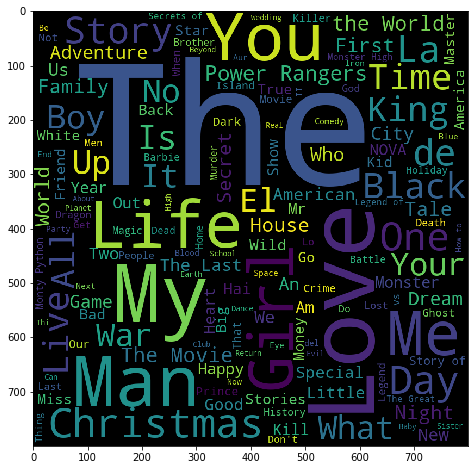

In [9]:
movie_titles = " ".join(data.title.values)
word_cloud = WordCloud(width=800,height=800,background_color='black',max_words=150).\
generate_from_text(movie_titles)
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()



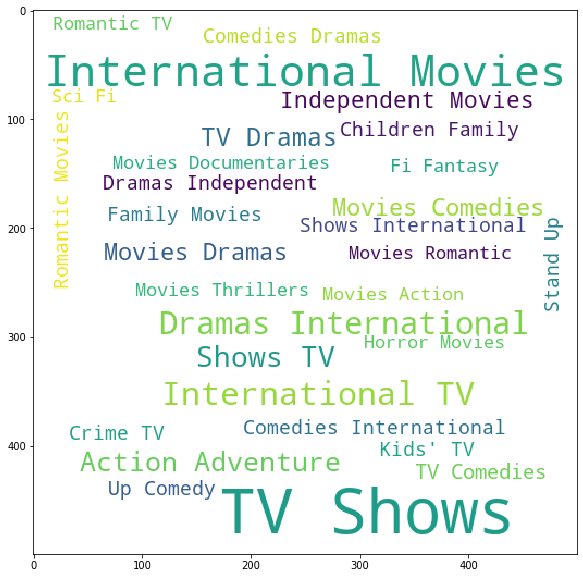

In [10]:
movie_genre = " ".join(data.listed_in.values)
word_cloud = WordCloud(width=500,height=500,background_color='white',max_words=30).\
generate_from_text(movie_genre)
plt.figure(figsize=[10,10])
plt.imshow(word_cloud)
plt.show()

In [11]:
len(dc)

896979

In [12]:
all_terms = []
fdist = {}
all_terms = dc.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [13]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

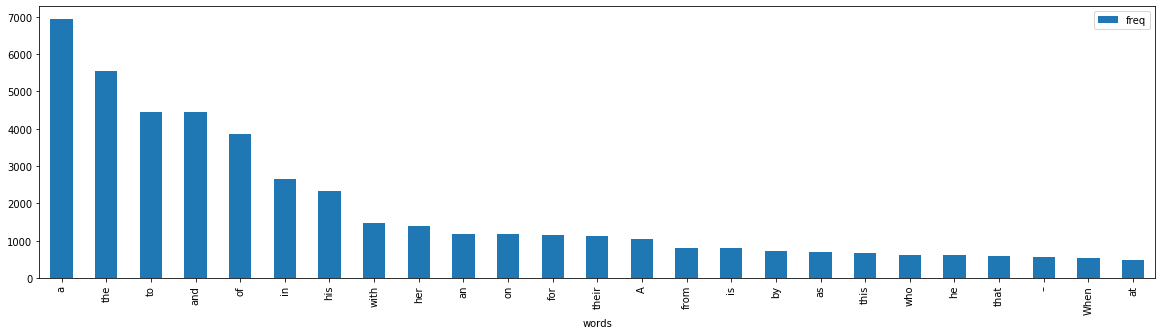

In [14]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5))

In [15]:
stop_nltk = stopwords.words("english")

In [16]:
stop_updated = stop_nltk + list(punctuation) + ["..."] 

In [17]:
from nltk.tokenize import word_tokenize

In [18]:
def  clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    res=""
    for term in tokens :
               if (term not in stop_updated and len(term) > 2):
                    res = res+" "+term
    res=res.strip()                
    return res

In [19]:
data['cd'] = data.description.apply(clean_txt)

In [20]:
reviews_combined = " ".join(data.cd.values)

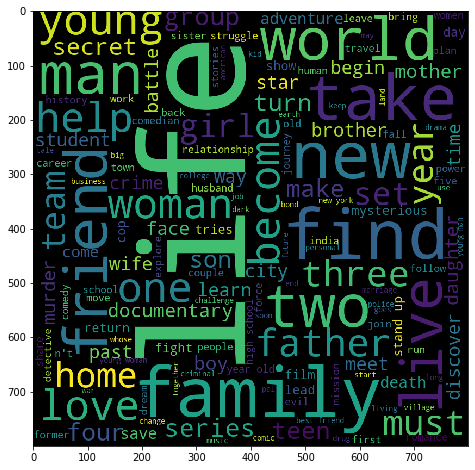

In [21]:
# Word cloud on cleaned dataset

reviews_combined = " ".join(data.cd.values)
word_cloud = WordCloud(width=800,height=800,background_color='black',max_words=150).\
generate_from_text(reviews_combined)
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [22]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [23]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

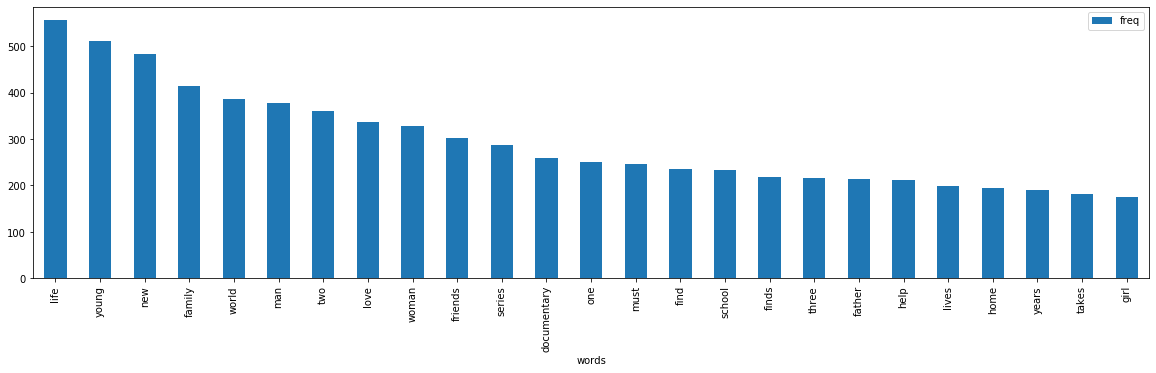

In [24]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans


In [26]:
tc= data['cd']
vector=TfidfVectorizer(stop_words='english')
tfidf = vector.fit_transform(tc)

In [27]:
k = 200
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()
request_transform = vector.transform(data['description'])
# new column cluster based on the description
data['cluster'] = kmeans.predict(request_transform) 

data['cluster'].value_counts().head()

37     5847
136     114
162       6
18        6
119       4
Name: cluster, dtype: int64

In [28]:
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]

In [29]:
import networkx as nx

In [30]:
import time 

In [31]:
G = nx.Graph(label="MOVIE")
start_time = time.time()
for i, rowi in data.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    G.add_node(rowi['title'],key=rowi['show_id'],label="MOVIE",mtype=rowi['type'],rating=rowi['rating'])
    for element in rowi['actors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="ACTED_IN")
    for element in rowi['categories']:
        G.add_node(element,label="CAT")
        G.add_edge(rowi['title'], element, label="CAT_IN")
    for element in rowi['directors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="DIRECTED")
    for element in rowi['countries']:
        G.add_node(element,label="COU")
        G.add_edge(rowi['title'], element, label="COU_IN")
    
    indices = find_similar(tfidf, i, top_n = 5)
    snode="Sim("+rowi['title'][:15].strip()+")"        
    G.add_node(snode,label="SIMILAR")
    G.add_edge(rowi['title'], snode, label="SIMILARITY")
    for element in indices:
        G.add_edge(snode, data['title'].loc[element], label="SIMILARITY")
print(" finish -- {} seconds --".format(time.time() - start_time))  

 iter 0 -- 0.034908294677734375 seconds --
 iter 1000 -- 6.9083099365234375 seconds --
 iter 2000 -- 12.447489261627197 seconds --
 iter 3000 -- 17.621676206588745 seconds --
 iter 4000 -- 22.94141411781311 seconds --
 iter 5000 -- 28.417762279510498 seconds --
 iter 6000 -- 34.250128746032715 seconds --
 finish -- 35.64056611061096 seconds --


In [32]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):        
                sub_graph.add(e)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = G.subgraph(sub_graph)
    colors=[]
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="MOVIE":
            colors.append('blue')
        elif G.nodes[e]['label']=="PERSON":
            colors.append('red')
        elif G.nodes[e]['label']=="CAT":
            colors.append('green')
        elif G.nodes[e]['label']=="COU":
            colors.append('yellow')
        elif G.nodes[e]['label']=="SIMILAR":
            colors.append('orange') 
        elif G.nodes[e]['label']=="CLUSTER":
            colors.append('orange')

    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors)
    plt.show()

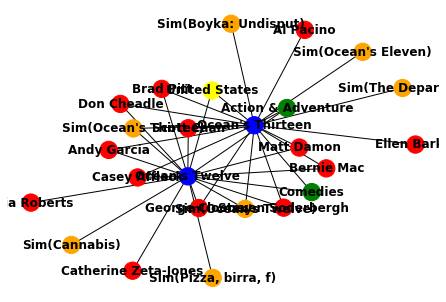

In [33]:
list_in=["Ocean's Twelve","Ocean's Thirteen"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

In [34]:
def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="MOVIE":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    movies=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        movies.append(key) 
        weight.append(w)
    result = pd.Series(data=np.array(weight),index=movies)
    result.sort_values(inplace=True,ascending=False)        
    return result;


In [35]:
result = get_recommendation("Ocean's Twelve")
result2 = get_recommendation("Ocean's Thirteen")
result3 = get_recommendation("The Devil Inside")
result4 = get_recommendation("Stranger Things")
print("*"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"*"*40)
print(result.head())
print("*"*40+"\n Recommendation for 'Ocean's Thirteen'\n"+"*"*40)
print(result2.head())
print("*"*40+"\n Recommendation for 'Belmonte'\n"+"*"*40)
print(result3.head())
print("*"*40+"\n Recommendation for 'Stranger Things'\n"+"*"*40)
print(result4.head())

****************************************
 Recommendation for 'Ocean's Twelve'
****************************************
Ocean's Thirteen     7.575565
Ocean's Eleven       1.542593
The Informant!       1.346214
Babel                1.199195
The Mask of Zorro    1.194038
dtype: float64
****************************************
 Recommendation for 'Ocean's Thirteen'
****************************************
Ocean's Twelve       7.575565
Ocean's Eleven       2.100704
The Departed         1.698527
Brooklyn's Finest    1.492545
Boyka: Undisputed    1.400020
dtype: float64
****************************************
 Recommendation for 'Belmonte'
****************************************
The Devil and Father Amorth              1.423117
Making a Murderer                        1.243407
Love Rhythms - Accidental Daddy          1.116221
Belief: The Possession of Janet Moses    1.116221
The Basement                             1.032475
dtype: float64
****************************************
 Recommenda